#### Import Library

In [2]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours, CondensedNearestNeighbour
from sklearn.preprocessing import RobustScaler, MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

#### Load Data

In [3]:
df = pd.read_csv("dataset/diabetes.csv")
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,NaN,72.0,35.0,0.0,NaN,0.627,NaN,1
1,1.0,85.0,66.0,29.0,0.0,NaN,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,NaN,40.0,35.0,168.0,43.1,NaN,33.0,1


#### Data Understanding

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               691 non-null    float64
 1   Glucose                   653 non-null    float64
 2   BloodPressure             614 non-null    float64
 3   SkinThickness             730 non-null    float64
 4   Insulin                   576 non-null    float64
 5   BMI                       538 non-null    float64
 6   DiabetesPedigreeFunction  691 non-null    float64
 7   Age                       614 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [5]:
df.shape

(768, 9)

##### Cek Missing Value tiap Kolom

In [6]:
df.isnull().sum()

Pregnancies                  77
Glucose                     115
BloodPressure               154
SkinThickness                38
Insulin                     192
BMI                         230
DiabetesPedigreeFunction     77
Age                         154
Outcome                       0
dtype: int64

##### Presentase Missing Value tiap Kolom

In [7]:
print(f'Missing values percentage:\n{(df.isnull().sum()/len(df))*100}')

Missing values percentage:
Pregnancies                 10.026042
Glucose                     14.973958
BloodPressure               20.052083
SkinThickness                4.947917
Insulin                     25.000000
BMI                         29.947917
DiabetesPedigreeFunction    10.026042
Age                         20.052083
Outcome                      0.000000
dtype: float64


#### Imputasi Missing Value dengan Mean, Median, dan Modus

In [8]:
df_me = df.copy() # untuk mean
df_med = df.copy() # untuk median
df_mod = df.copy() # untuk modus

In [9]:
df_me = df_me.fillna(df_me.mean()) # imputasi mean
df_med = df_med.fillna(df_med.median()) # imputasi median
df_mode = df_mod.mode().iloc[0]  # ambil baris pertama dari hasil modus
df_mod = df_mod.fillna(df_mode) # imputasi modus

#### Cek korelasi antar variabel dengan heatmap

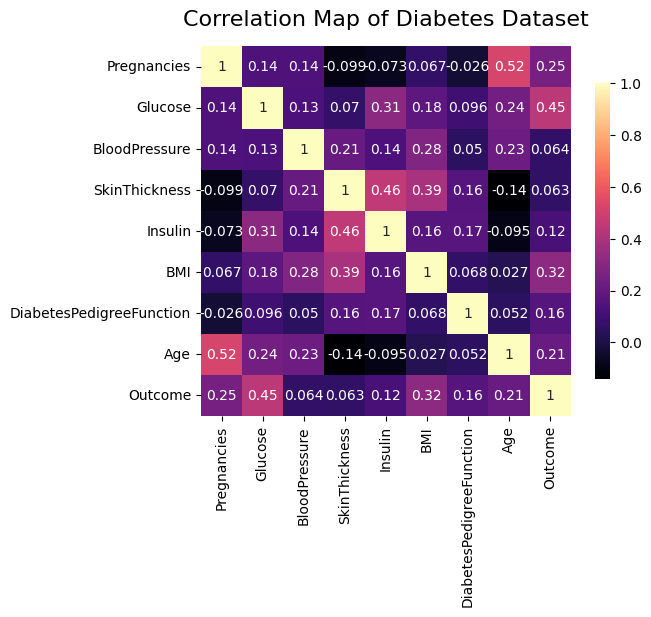

In [10]:
sns.heatmap(df.corr(), annot=True, cmap='magma', square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Map of Diabetes Dataset", fontsize=16, pad=15)
plt.show()

#### Imbalance Handling dengan Undersampling + Mean Imputasi

In [11]:
x_mean=df_me.drop('Outcome', axis=1)
y_mean=df_me['Outcome']

random = RandomUnderSampler(sampling_strategy='not minority', random_state=42) # semua class kecuali minority
x_resampled_mean, y_resampled_mean = random.fit_resample(x_mean, y_mean)

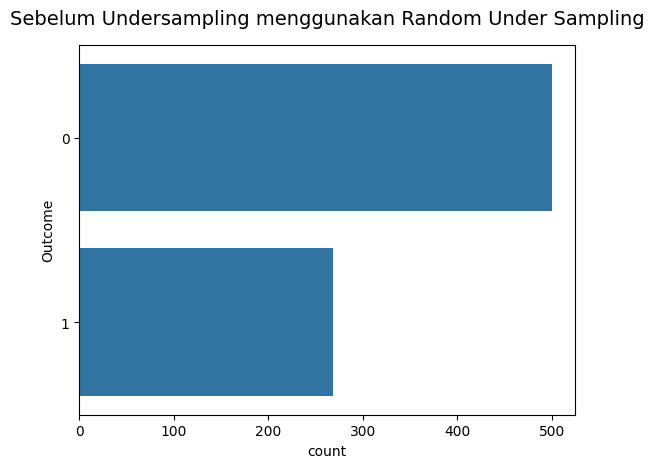

In [12]:
sns.countplot(data=df_me, y=y_mean)
plt.title("Sebelum Undersampling menggunakan Random Under Sampling", fontsize=14, pad=15)
plt.show()

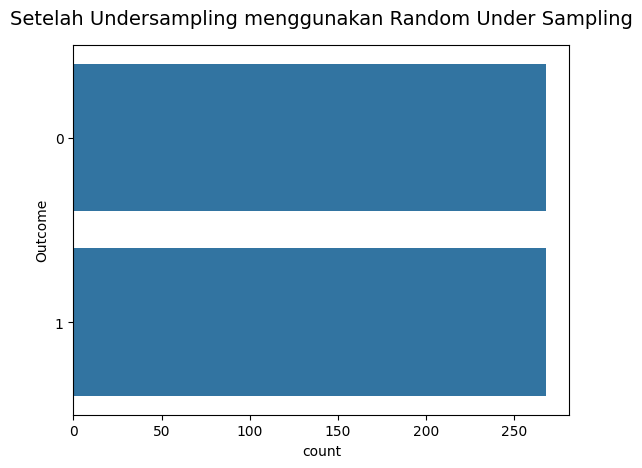

In [13]:
sns.countplot(data=x_resampled_mean, y=y_resampled_mean)
plt.title("Setelah Undersampling menggunakan Random Under Sampling", fontsize=14, pad=15)
plt.show()

#### Imbalance Handling dengan Undersampling + Median Imputasi

In [14]:
x_median=df_med.drop('Outcome', axis=1)
y_median=df_med['Outcome']

enn = EditedNearestNeighbours(sampling_strategy='majority') # hanya kelas majority
x_resampled_median, y_resampled_median = enn.fit_resample(x_median, y_median)

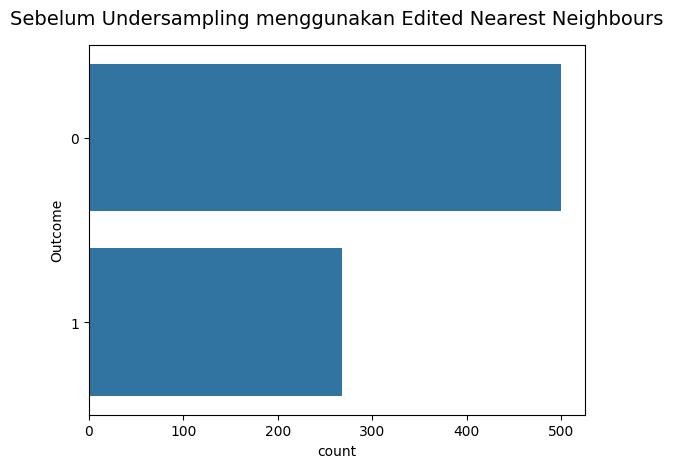

In [15]:
sns.countplot(data=df_med, y=y_median)
plt.title("Sebelum Undersampling menggunakan Edited Nearest Neighbours", fontsize=14, pad=15)
plt.show()

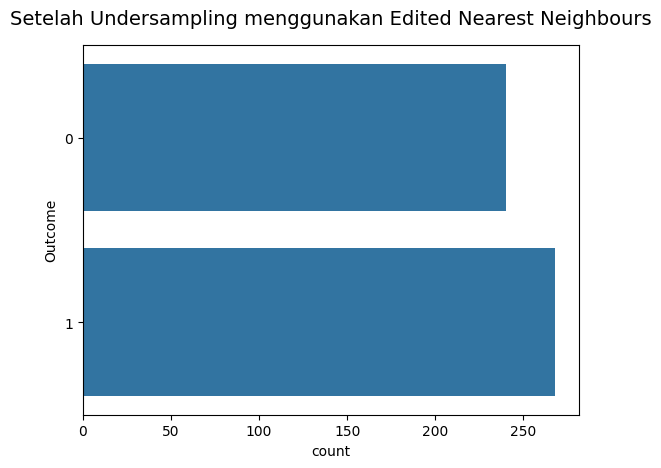

In [16]:
sns.countplot(data=x_resampled_median, y=y_resampled_median)
plt.title("Setelah Undersampling menggunakan Edited Nearest Neighbours", fontsize=14, pad=15)
plt.show()

#### Imbalance Handling dengan Undersampling + Modus Imputasi

In [17]:
x_modus=df_mod.drop('Outcome', axis=1)
y_modus=df_mod['Outcome']

cnn = CondensedNearestNeighbour(sampling_strategy='auto') # seperti not minority
x_resampled_modus, y_resampled_modus = cnn.fit_resample(x_modus, y_modus)

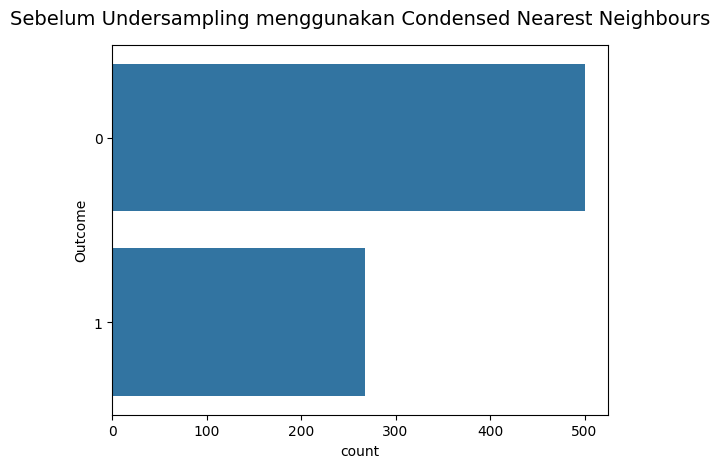

In [18]:
sns.countplot(data=df_mod, y=y_modus)
plt.title("Sebelum Undersampling menggunakan Condensed Nearest Neighbours", fontsize=14, pad=15)
plt.show()

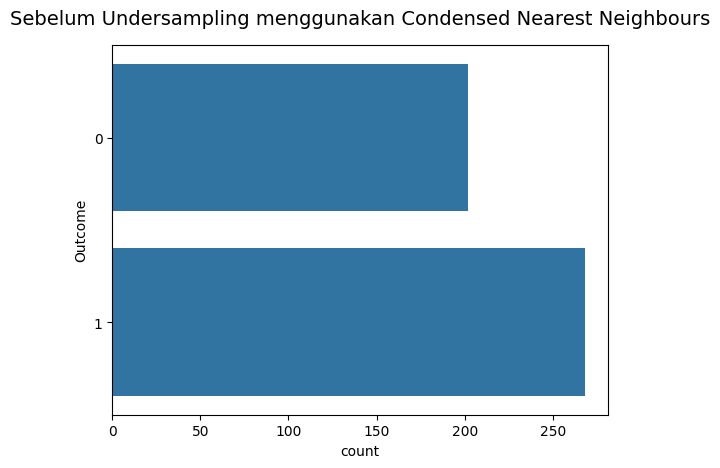

In [19]:
sns.countplot(data=x_resampled_modus, y=y_resampled_modus)
plt.title("Sebelum Undersampling menggunakan Condensed Nearest Neighbours", fontsize=14, pad=15)
plt.show()

#### Scaling dengan Robust Scaler dan Minmax Mean Imputation

In [20]:
scaler = RobustScaler()
df_robust_mean = x_resampled_mean.copy()
df_robust_mean[df_robust_mean.columns.difference(['Outcome'])] = scaler.fit_transform(df_robust_mean[df_robust_mean.columns.difference(['Outcome'])])

In [21]:
df_robust_mean.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
556,-0.560637,-0.710984,0.086726,0.56250,0.000000,0.000000,-0.590302,-0.263844
117,0.239363,0.000000,-1.746607,-0.68750,-0.807123,0.416176,0.635278,-0.680510
572,-0.160637,-0.286742,-0.913274,0.28125,-0.345181,-0.608215,0.005622,-0.930510


In [22]:
scaler = MinMaxScaler()
df_minmax_mean = x_resampled_mean.copy()
df_minmax_mean[df_minmax_mean.columns.difference(['Outcome'])] = scaler.fit_transform(df_minmax_mean[df_minmax_mean.columns.difference(['Outcome'])])

In [23]:
df_minmax_mean.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
556,0.058824,0.487437,0.614035,0.404040,0.141581,0.476806,0.059688,0.176471
117,0.294118,0.605339,0.421053,0.000000,0.000000,0.502235,0.253898,0.078431
572,0.176471,0.557789,0.508772,0.313131,0.081031,0.439642,0.154120,0.019608


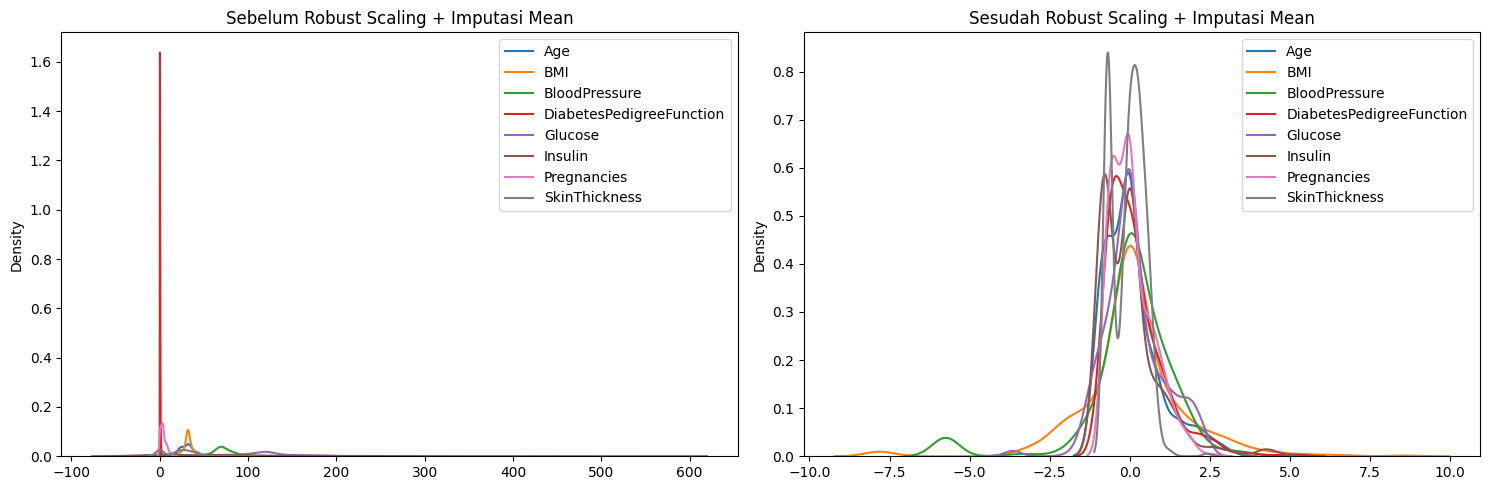

In [24]:
numeric_columns = df_robust_mean.columns.difference(['Outcome'])
plt.figure(figsize=(15, 5))

# sebelum
plt.subplot(121)
for column in numeric_columns:
    sns.distplot(x_resampled_mean[column], hist=False, label=column)
plt.title('Sebelum Robust Scaling + Imputasi Mean')
plt.xlabel('')
plt.legend()

# sesudah
plt.subplot(122)
for column in numeric_columns:
    sns.distplot(df_robust_mean[column], hist=False, label=column)
plt.title('Sesudah Robust Scaling + Imputasi Mean')
plt.xlabel('')
plt.legend()

plt.tight_layout()
plt.show()

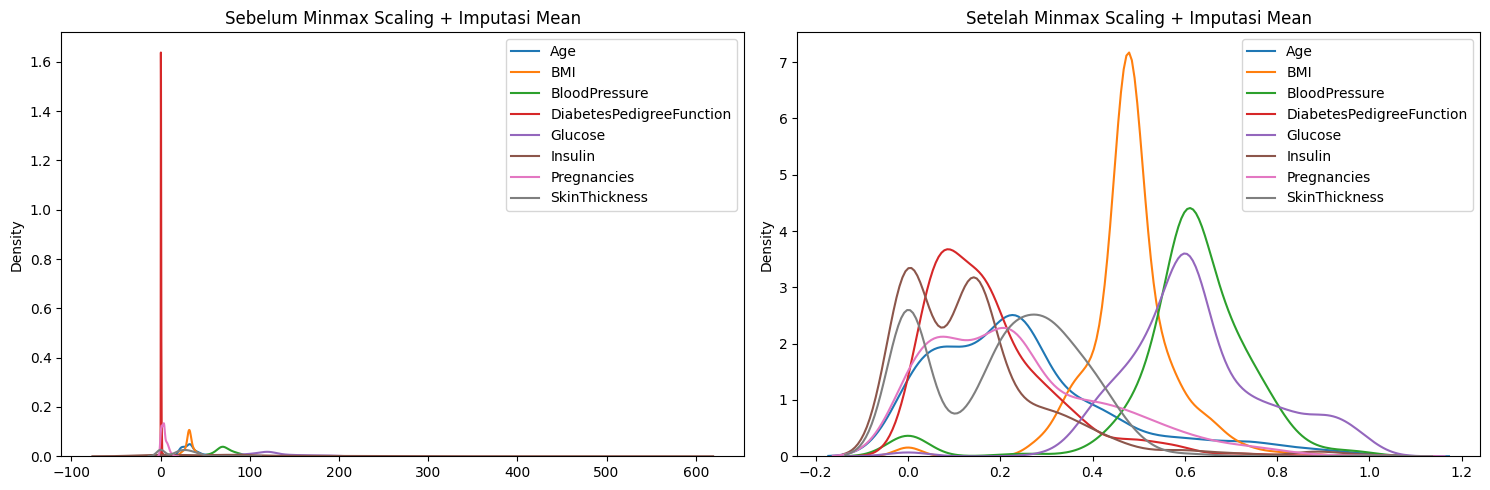

In [25]:
numeric_columns = df_minmax_mean.columns.difference(['Outcome'])
plt.figure(figsize=(15, 5))

# sebelum
plt.subplot(121)
for column in numeric_columns:
    sns.distplot(x_resampled_mean[column], hist=False, label=column)
plt.title('Sebelum Minmax Scaling + Imputasi Mean')
plt.xlabel('')
plt.legend()

# sesudah
plt.subplot(122)
for column in numeric_columns:
    sns.distplot(df_minmax_mean[column], hist=False, label=column)
plt.title('Setelah Minmax Scaling + Imputasi Mean')
plt.xlabel('')
plt.legend()

plt.tight_layout()
plt.show()

#### Scaling dengan Robust Scaler dan Minmax Median Imputation

In [26]:
scaler = RobustScaler()
df_robust_median = x_resampled_median.copy()
df_robust_median[df_robust_median.columns.difference(['Outcome'])] = scaler.fit_transform(df_robust_median[df_robust_median.columns.difference(['Outcome'])])

In [27]:
df_robust_median.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.470588,-0.692308,-0.428571,0.00000,0.760656,-0.822335,-0.591486,-0.727273
1,0.235294,0.000000,1.428571,-0.71875,-0.472131,0.000000,-0.519791,0.090909
2,-0.470588,-0.333333,-3.000000,0.46875,0.616393,0.000000,0.000000,0.363636


In [28]:
scaler = MinMaxScaler()
df_minmax_median = x_resampled_median.copy()
df_minmax_median[df_minmax_median.columns.difference(['Outcome'])] = scaler.fit_transform(df_minmax_median[df_minmax_median.columns.difference(['Outcome'])])

In [29]:
df_minmax_median.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.058824,0.447236,0.578947,0.232323,0.173112,0.418778,0.043225,0.000000
1,0.235294,0.582915,0.807018,0.000000,0.000000,0.479136,0.054881,0.183673
2,0.058824,0.517588,0.263158,0.383838,0.152855,0.479136,0.139388,0.244898


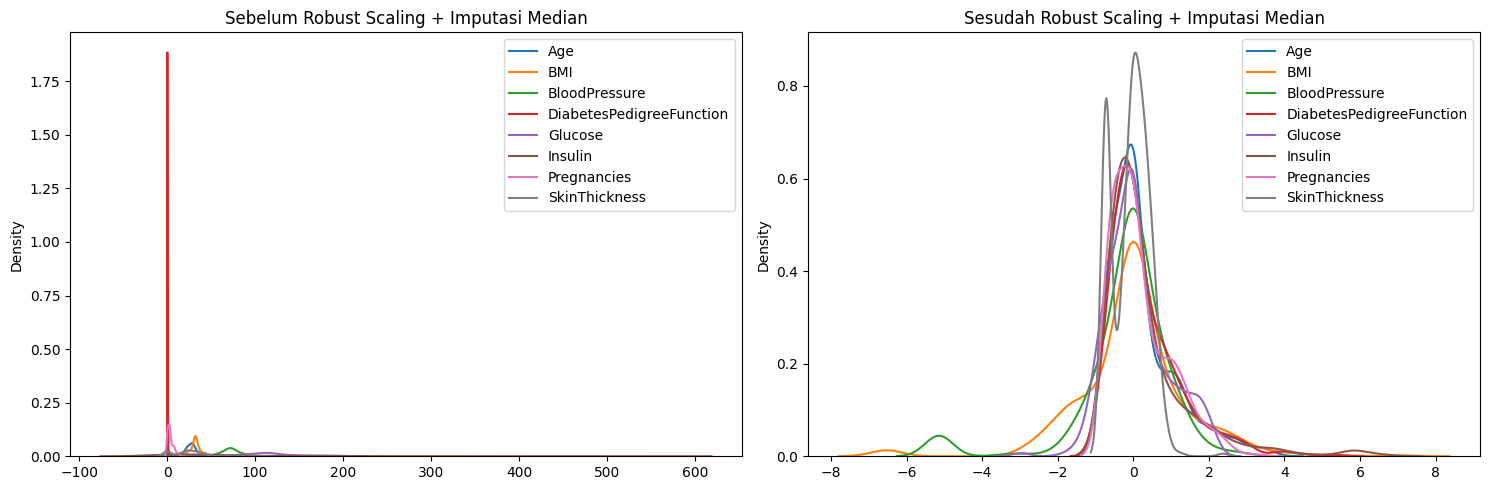

In [30]:
numeric_columns = df_robust_median.columns.difference(['Outcome'])
plt.figure(figsize=(15, 5))

# sebelum
plt.subplot(121)
for column in numeric_columns:
    sns.distplot(x_resampled_median[column], hist=False, label=column)
plt.title('Sebelum Robust Scaling + Imputasi Median')
plt.xlabel('')
plt.legend()

# sesudah
plt.subplot(122)
for column in numeric_columns:
    sns.distplot(df_robust_median[column], hist=False, label=column)
plt.title('Sesudah Robust Scaling + Imputasi Median')
plt.xlabel('')
plt.legend()

plt.tight_layout()
plt.show()

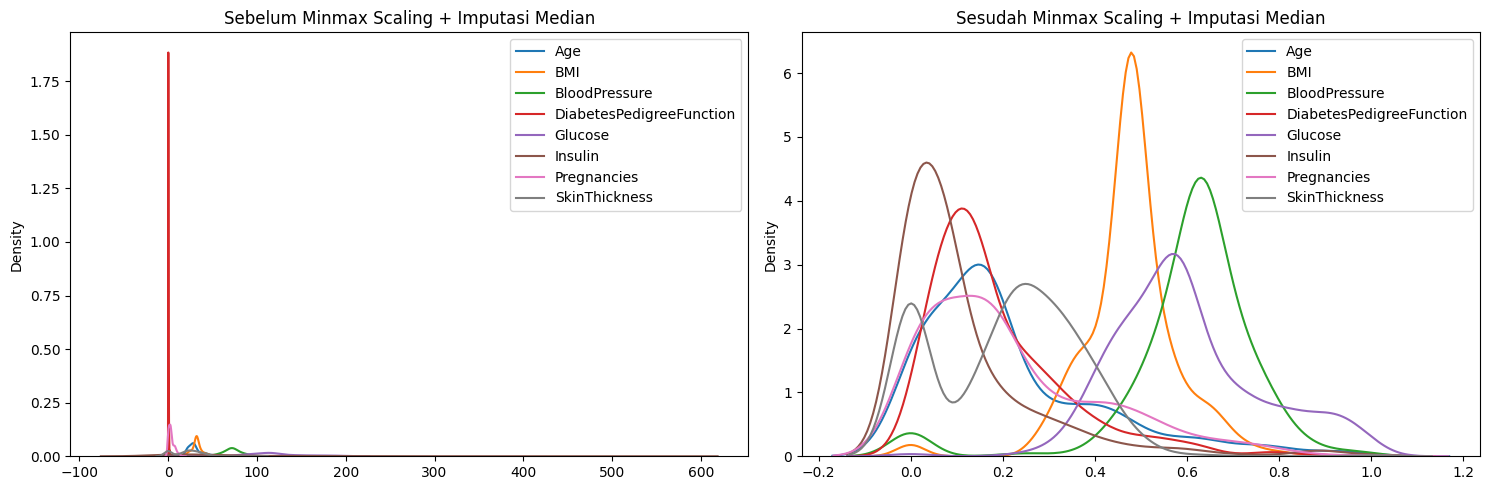

In [31]:
numeric_columns = df_minmax_median.columns.difference(['Outcome'])
plt.figure(figsize=(15, 5))

# sebelum
plt.subplot(121)
for column in numeric_columns:
    sns.distplot(x_resampled_median[column], hist=False, label=column)
plt.title('Sebelum Minmax Scaling + Imputasi Median')
plt.xlabel('')
plt.legend()

# sesudah
plt.subplot(122)
for column in numeric_columns:
    sns.distplot(df_minmax_median[column], hist=False, label=column)
plt.title('Sesudah Minmax Scaling + Imputasi Median')
plt.xlabel('')
plt.legend()

plt.tight_layout()
plt.show()

#### Scaling dengan Robust Scaler dan Minmax Mode Imputation

In [32]:
scaler = RobustScaler()
df_robust_modus = x_resampled_modus.copy()
df_robust_modus[df_robust_modus.columns.difference(['Outcome'])] = scaler.fit_transform(df_robust_modus[df_robust_modus.columns.difference(['Outcome'])])

In [33]:
df_robust_modus.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.6,-0.369565,-1.500000,-0.727273,0.0,0.000000,-0.635193,-0.388889
1,-0.4,-0.739130,-0.333333,0.151515,0.0,0.000000,0.034335,0.166667
2,0.4,-0.065217,0.333333,-0.727273,0.0,-1.435897,-0.333538,0.111111


In [34]:
scaler = MinMaxScaler()
df_minmax_modus = x_resampled_modus.copy()
df_minmax_modus[df_minmax_modus.columns.difference(['Outcome'])] = scaler.fit_transform(df_minmax_modus[df_minmax_modus.columns.difference(['Outcome'])])

In [35]:
df_minmax_modus.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.000000,0.512563,0.456140,0.000000,0.0,0.464978,0.000000,0.000000
1,0.058824,0.427136,0.578947,0.292929,0.0,0.464978,0.132589,0.166667
2,0.294118,0.582915,0.649123,0.000000,0.0,0.381520,0.059738,0.150000


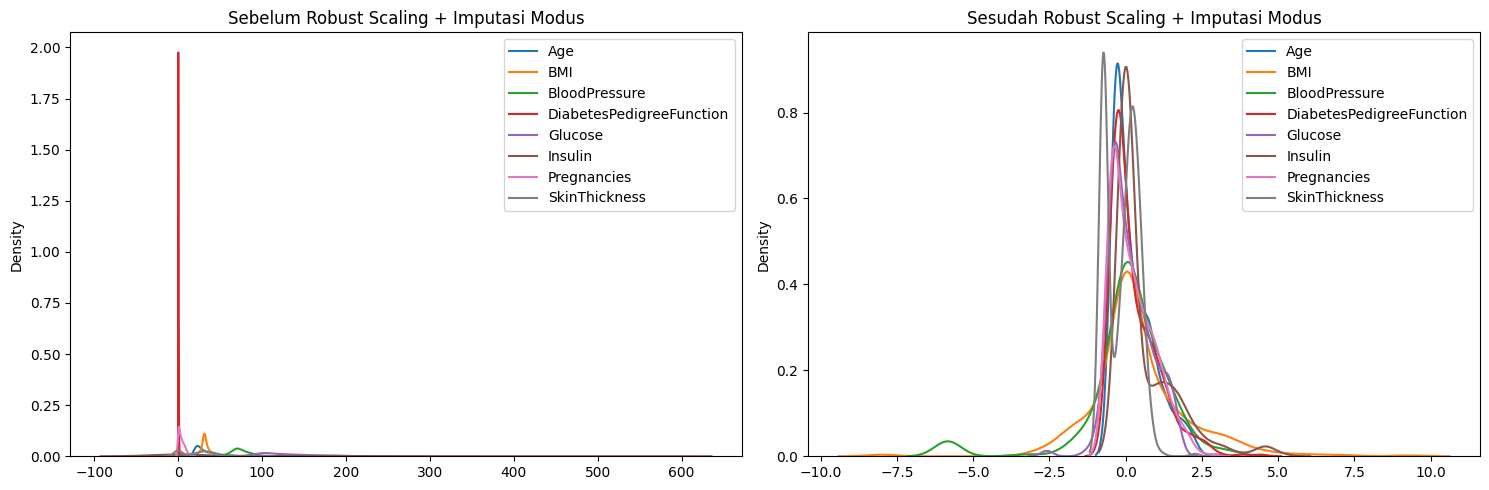

In [36]:
numeric_columns = df_robust_modus.columns.difference(['Outcome'])
plt.figure(figsize=(15, 5))

# sebelum
plt.subplot(121)
for column in numeric_columns:
    sns.distplot(x_resampled_modus[column], hist=False, label=column)
plt.title('Sebelum Robust Scaling + Imputasi Modus')
plt.xlabel('')
plt.legend()

# sesudah
plt.subplot(122)
for column in numeric_columns:
    sns.distplot(df_robust_modus[column], hist=False, label=column)
plt.title('Sesudah Robust Scaling + Imputasi Modus')
plt.xlabel('')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
numeric_columns = df_minmax_modus.columns.difference(['Outcome'])
plt.figure(figsize=(15, 5))

# sebelum 
plt.subplot(121)
for column in numeric_columns:
    sns.distplot(x_resampled_modus[column], hist=False, label=column)
plt.title('Sebelum Minmax Scaling + Imputasi Modus')
plt.xlabel('')
plt.legend()

# sesudah
plt.subplot(122)
for column in numeric_columns:
    sns.distplot(df_minmax_modus[column], hist=False, label=column)
plt.title('Sesudah MinMax Scaling + Imputasi Modus')
plt.xlabel('')
plt.legend()

plt.tight_layout()
plt.show()